In [254]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [255]:
df=pd.read_csv('C:/mohamed/Loan_Default.csv')

In [256]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [257]:
df.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [259]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [260]:
for i in range(len(df.columns)):
    col = df.columns[i]
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
    

In [261]:
df['ID']=df['ID'].astype('object')
df['year']=df['year'].astype('object')

In [262]:
df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [263]:
df.duplicated().sum()

0

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  object 
 1   year                       148670 non-null  object 
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

<AxesSubplot:xlabel='Status', ylabel='count'>

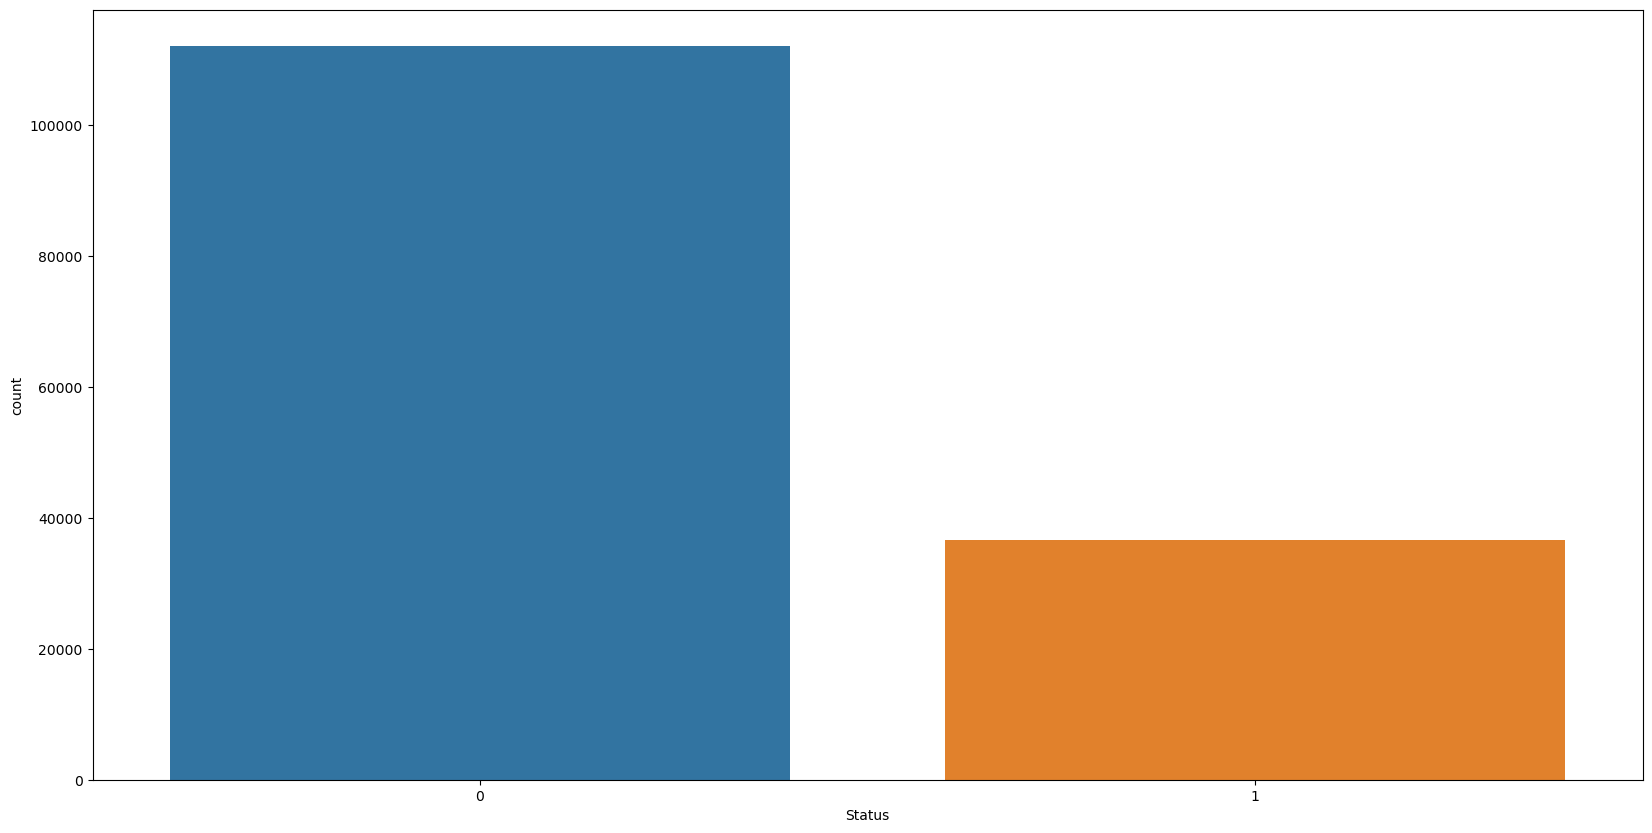

In [265]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Status'])

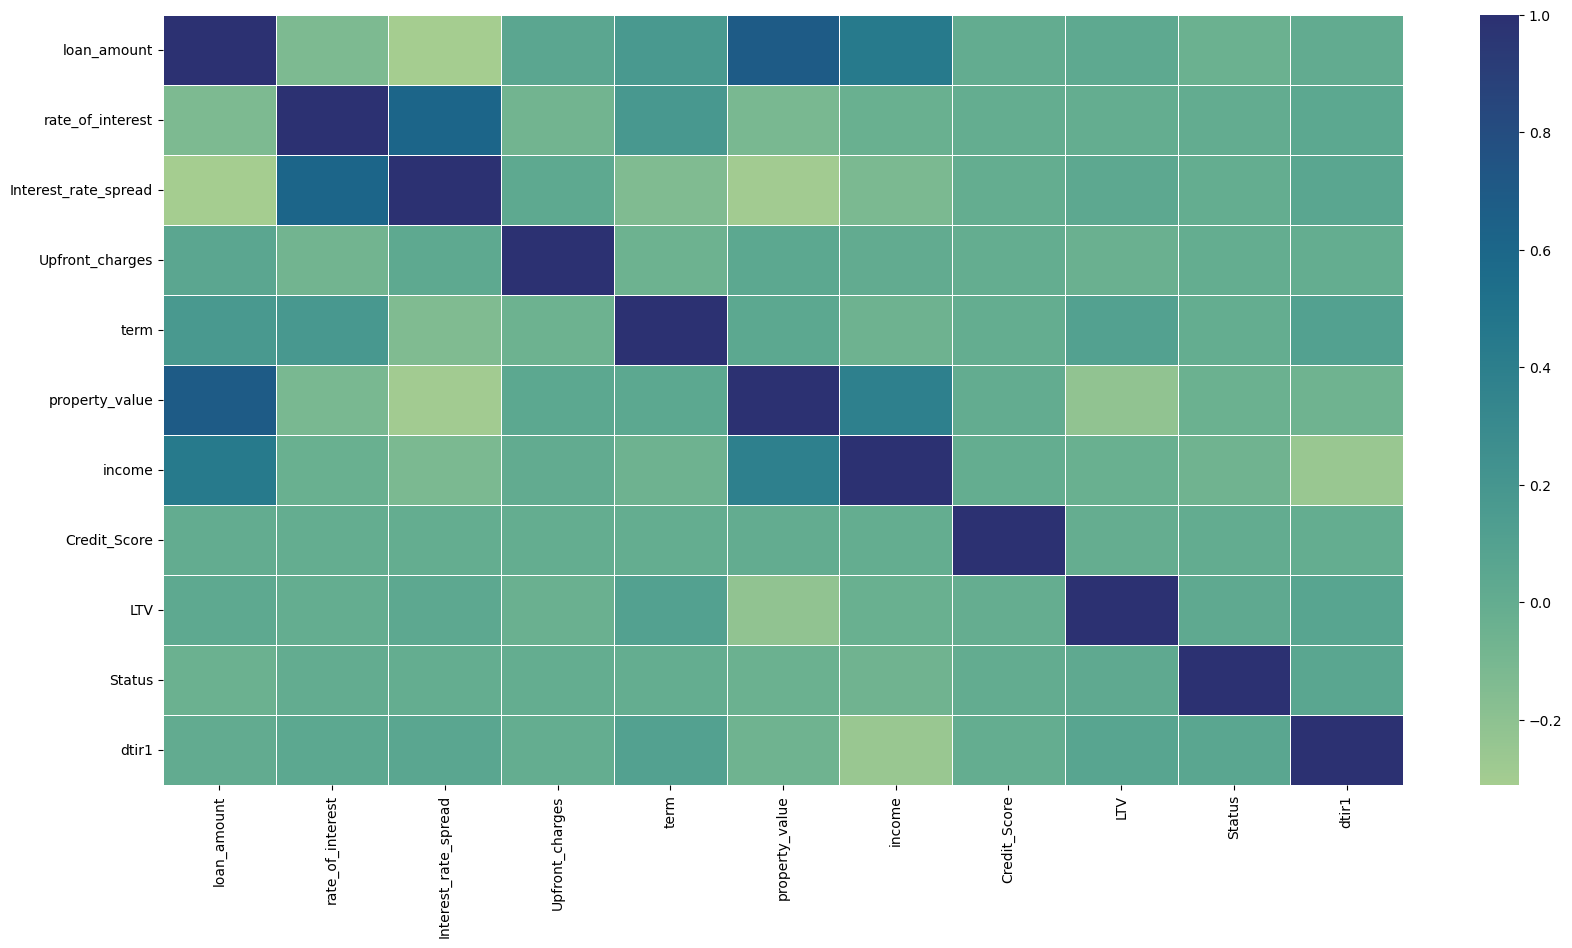

In [266]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),cmap='crest',linewidth=.5)
plt.show()

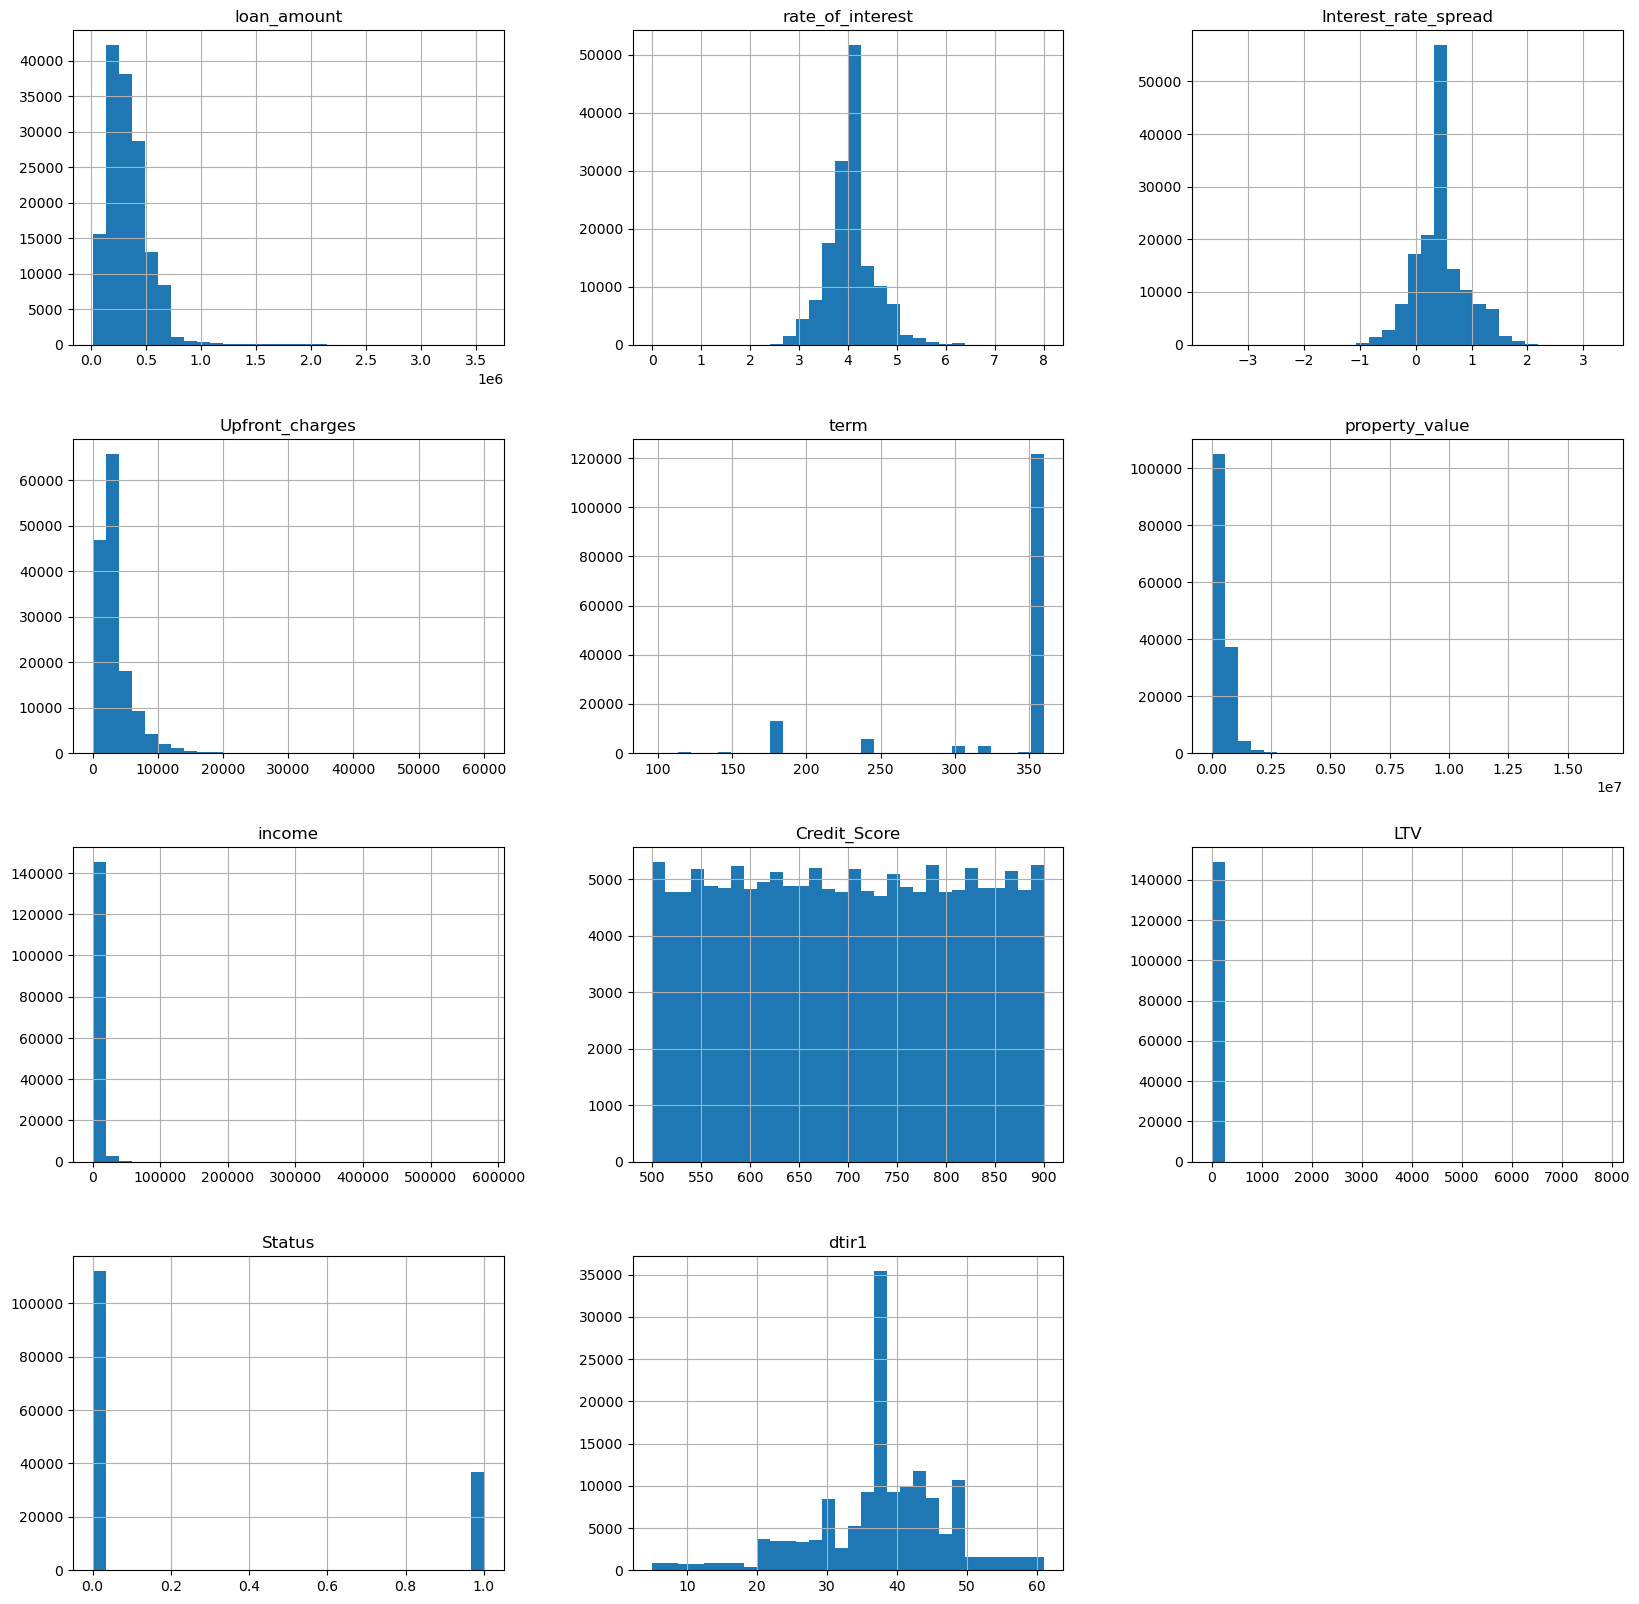

In [267]:
df.hist(figsize=(20,20),bins=30)
plt.show()

In [268]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
label_encoder = LabelEncoder()

for i in range(len(df.columns)):
    col = df.columns[i]
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
    


# Train Test Split

In [269]:
X=df.drop(columns='Status')
y=df['Status']
y.shape

(148670,)

In [325]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X = selector.fit_transform(X, y)


array([[ 0.        ,  0.        ,  1.        , ...,  0.        ,
         1.        , 45.        ],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.        , 37.73293242],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         1.        , 46.        ],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         0.        , 49.        ],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         1.        , 29.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 44.        ]])

In [271]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [272]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((111502, 10), (37168, 10), (111502,), (37168,))

# Logistic Regression model

In [273]:
lr_model=LogisticRegression(
max_iter=300,
)
y_train.shape

(111502,)

In [274]:
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [275]:
y_pred=lr_model.predict(X_test)

In [276]:
print("Logistic Regression accuracy = {:.2f} %".format(accuracy_score(y_test,y_pred)*100))

Logistic Regression accuracy = 76.73 %


In [277]:
coefficients = lr_model.coef_[0]
intercept = lr_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 2.41905811e-01  9.92723955e-02 -6.41140429e-01 -9.61250422e-01
 -7.44404410e-01 -2.98149180e-05  1.93705835e-01  9.06134017e-01
  3.66779937e-01  1.20738854e-02]
Intercept: [-0.35198775]


In [278]:
y_pred_prob = lr_model.predict_proba(X_test)[:, 1] 


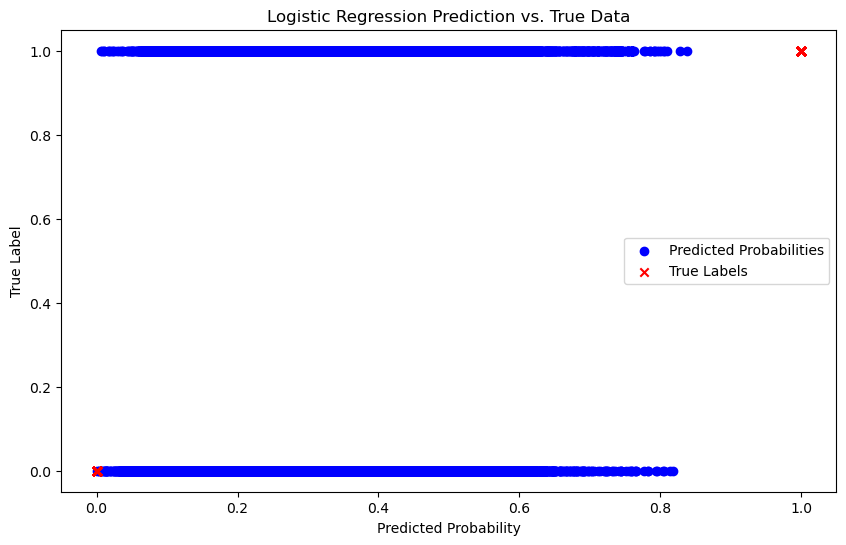

In [279]:
plt.figure(figsize=(10, 6))

plt.scatter(y_pred_prob, y_test, color='blue', label='Predicted Probabilities')

plt.scatter(y_test, y_test, color='red', marker='x', label='True Labels')

plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Logistic Regression Prediction vs. True Data')
plt.legend()
plt.show()


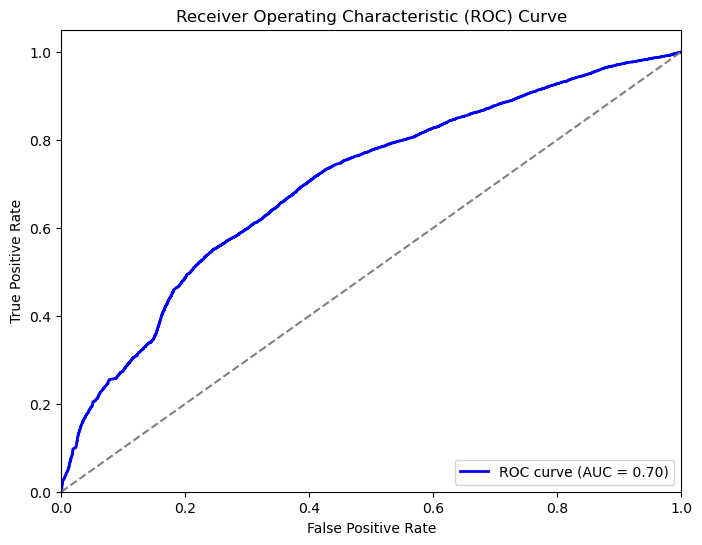

In [280]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


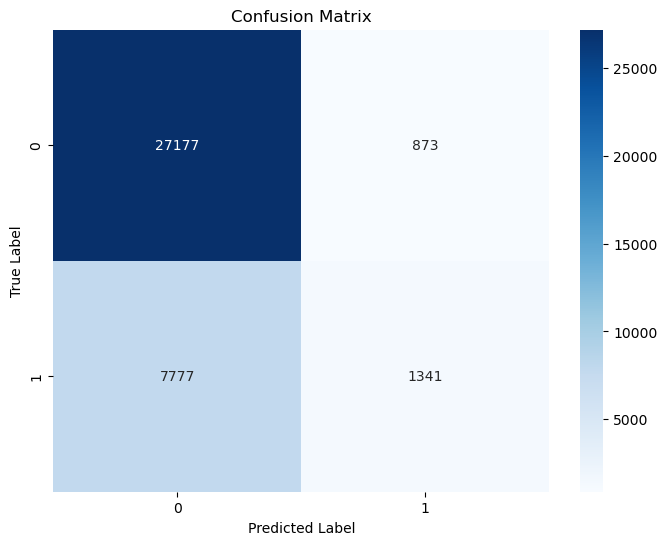

In [281]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


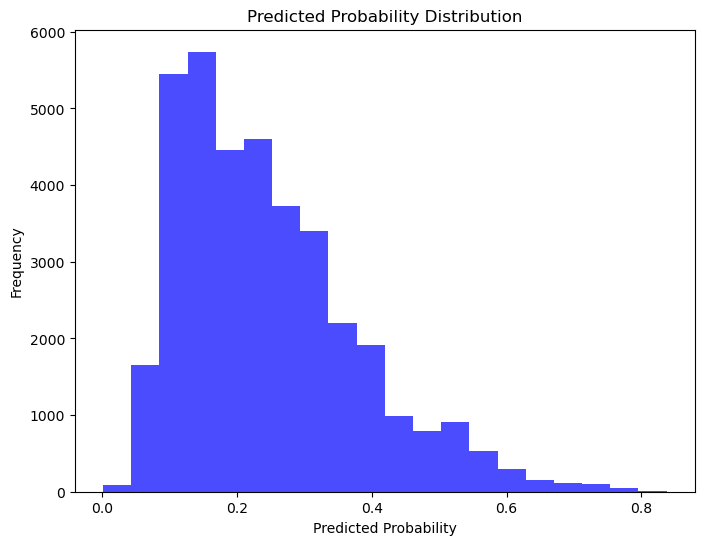

In [282]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob, bins=20, color='blue', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution')
plt.show()


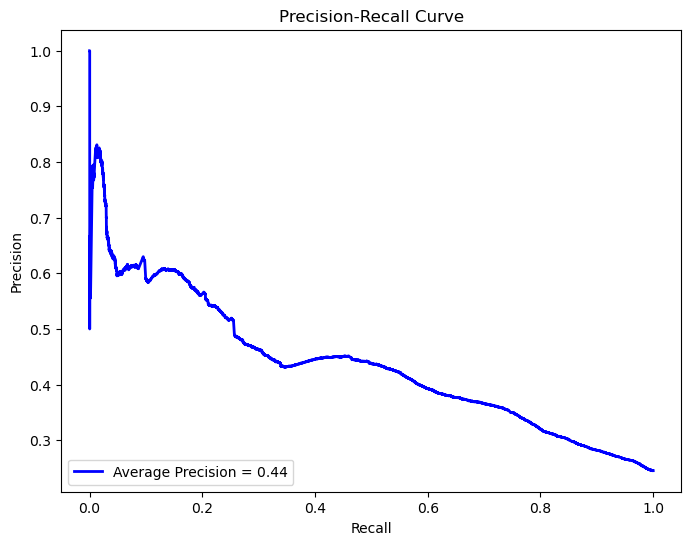

In [283]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# Decision Tree

In [284]:
DTmodel=DecisionTreeClassifier()
DTmodel.fit(X_train,y_train)
y_pred=DTmodel.predict(X_test)

In [285]:
y_pred_prob = DTmodel.predict_proba(X_test)[:, 1] 


In [286]:
print("Decision Tree accuracy = {:.2f} %".format(accuracy_score(y_test,y_pred)*100))

Decision Tree accuracy = 82.06 %


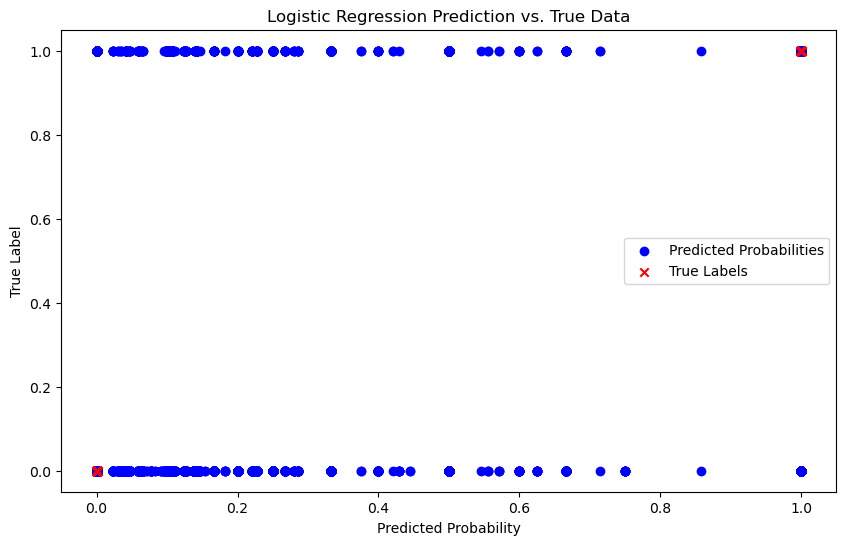

In [287]:
plt.figure(figsize=(10, 6))

plt.scatter(y_pred_prob, y_test, color='blue', label='Predicted Probabilities')

plt.scatter(y_test, y_test, color='red', marker='x', label='True Labels')

plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Logistic Regression Prediction vs. True Data')
plt.legend()
plt.show()


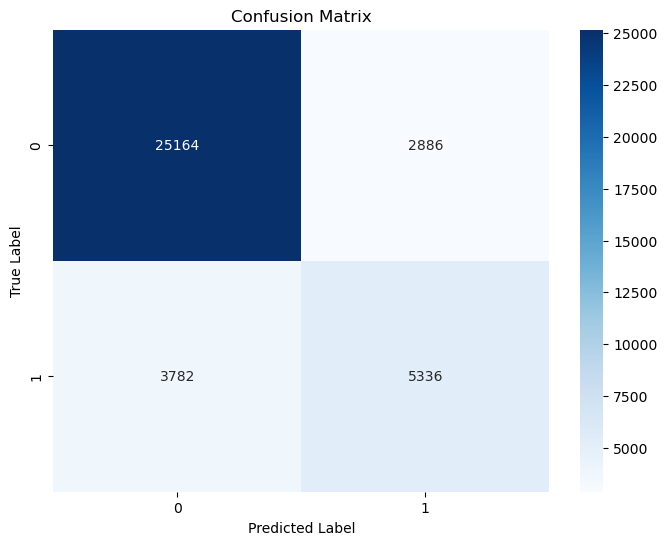

In [288]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


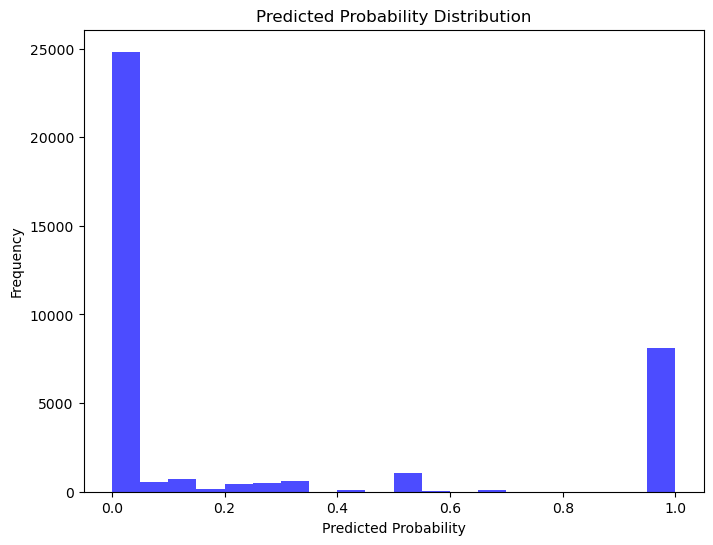

In [289]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob, bins=20, color='blue', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution')
plt.show()


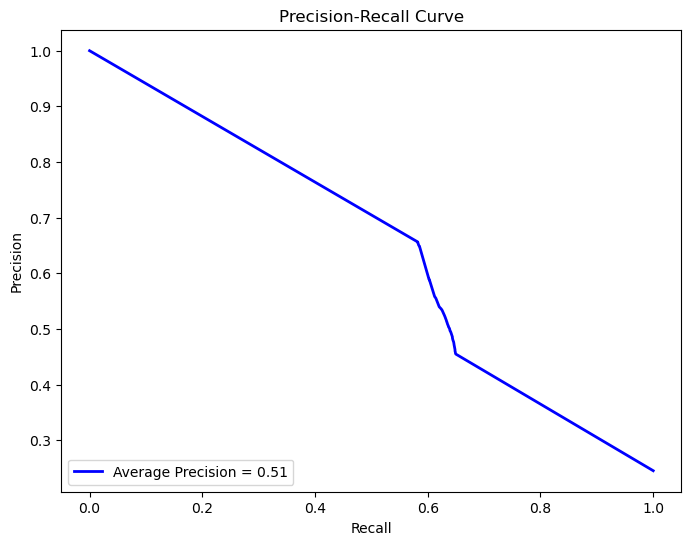

In [290]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# Random Forest Model

In [291]:
RFmodel=RandomForestClassifier()

In [292]:
RFmodel.fit(X_train,y_train)
y_pred=RFmodel.predict(X_test)

In [293]:
y_pred_prob = DTmodel.predict_proba(X_test)[:, 1] 


In [294]:
print("Random Forest  accuracy = {:.2f} %".format(accuracy_score(y_test,y_pred)*100))

Random Forest  accuracy = 83.92 %


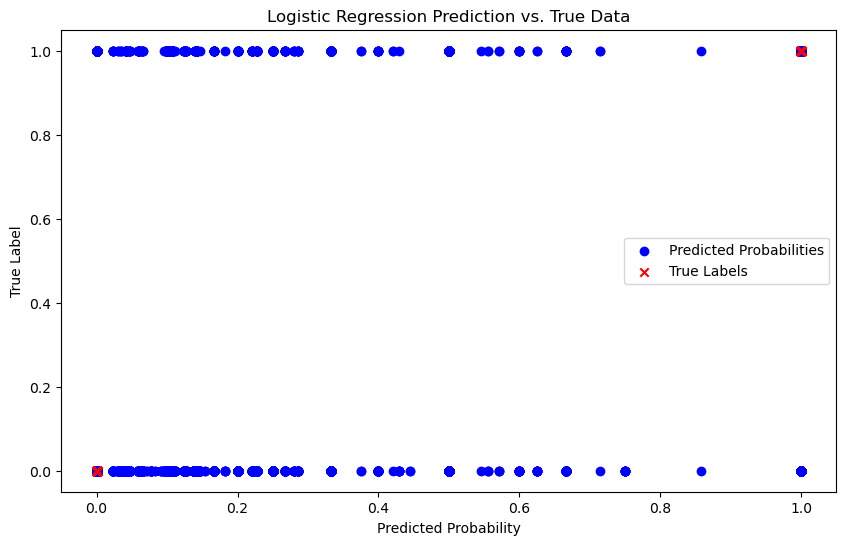

In [295]:
plt.figure(figsize=(10, 6))

plt.scatter(y_pred_prob, y_test, color='blue', label='Predicted Probabilities')

plt.scatter(y_test, y_test, color='red', marker='x', label='True Labels')

plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Logistic Regression Prediction vs. True Data')
plt.legend()
plt.show()

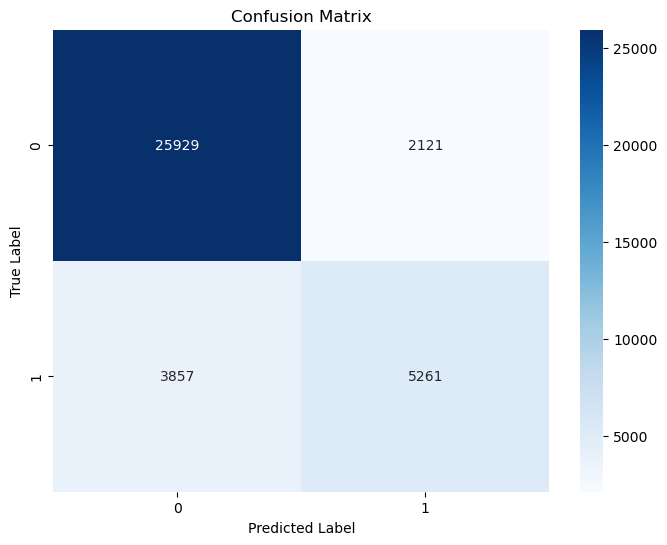

In [296]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


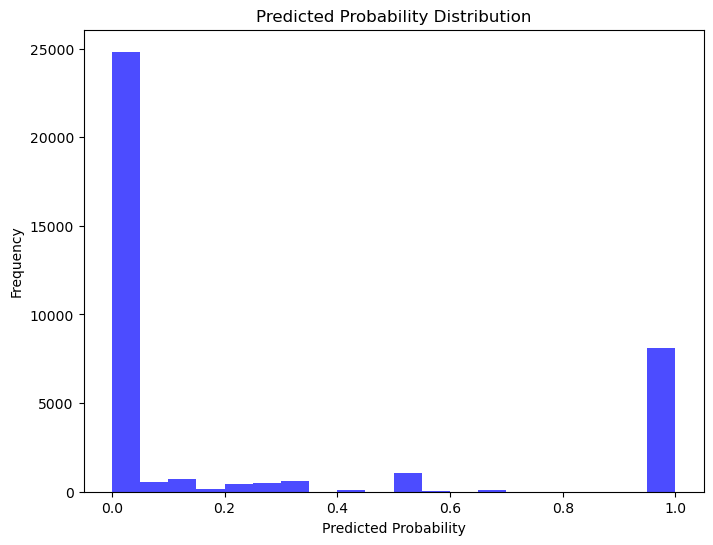

In [297]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob, bins=20, color='blue', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution')
plt.show()


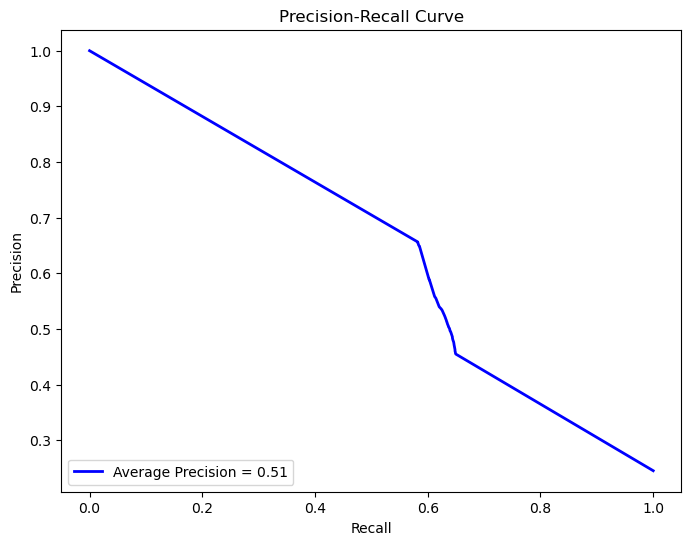

In [298]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Average Precision = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [320]:
# Assuming you have a model and data
sum=0
for idx, prob in enumerate(y_pred_prob):
    if prob >0.8:
        print("Loan application with high probability of default. Evaluate further.")
        sum+=1


Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probability of default. Evaluate further.
Loan application with high probabi

In [321]:
print('sum of Loan application with high probability of default = ',sum)

sum of Loan application with high probability of default =  8084


In [350]:
from sklearn.ensemble import RandomForestClassifier


names=df.columns.tolist()
feature_importances = RFmodel.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
for idx in sorted_indices:
    print(f"Feature: {names[idx]}, Importance: {feature_importances[idx]}")


Feature: loan_type, Importance: 0.36147648373754665
Feature: business_or_commercial, Importance: 0.2635995003974792
Feature: loan_purpose, Importance: 0.24140863100882093
Feature: year, Importance: 0.03137427248021698
Feature: approv_in_adv, Importance: 0.02758115334892934
Feature: Credit_Worthiness, Importance: 0.027444950897551453
Feature: Gender, Importance: 0.020015705612616626
Feature: open_credit, Importance: 0.0134517781308392
Feature: loan_limit, Importance: 0.00726030494275845
Feature: ID, Importance: 0.006387219443241028


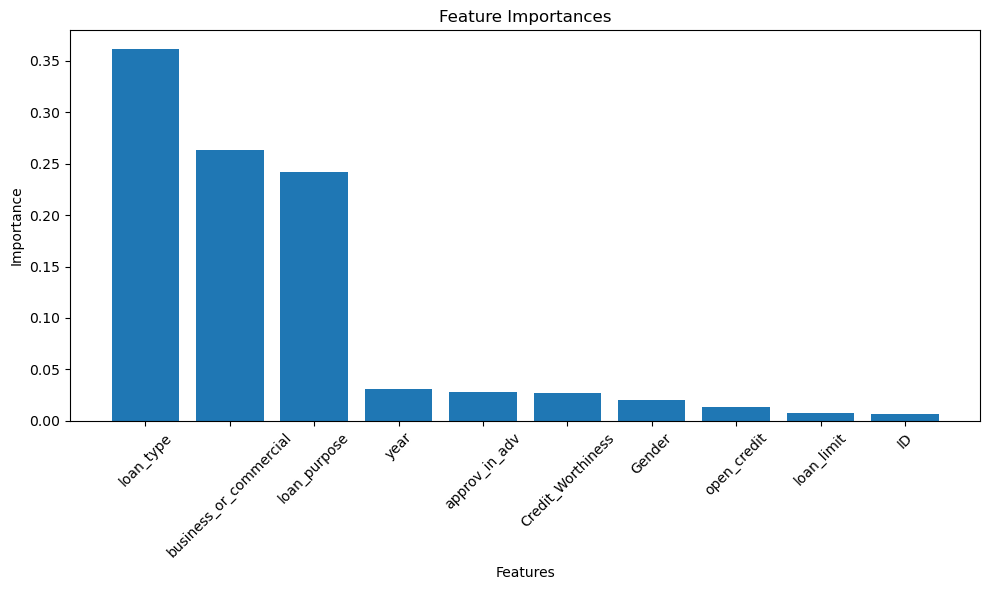

In [351]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), [names[i] for i in sorted_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()